In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

import random
import numpy as np
import scipy as sp
from scipy import stats

In [2]:
data = pd.read_csv(r"bodyPerformance.csv")

In [3]:
data.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [4]:
# Display column statistics
data.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'height_cm'}>],
       [<AxesSubplot:title={'center':'weight_kg'}>,
        <AxesSubplot:title={'center':'body fat_%'}>],
       [<AxesSubplot:title={'center':'diastolic'}>,
        <AxesSubplot:title={'center':'systolic'}>],
       [<AxesSubplot:title={'center':'gripForce'}>,
        <AxesSubplot:title={'center':'sit and bend forward_cm'}>],
       [<AxesSubplot:title={'center':'sit-ups counts'}>,
        <AxesSubplot:title={'center':'broad jump_cm'}>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

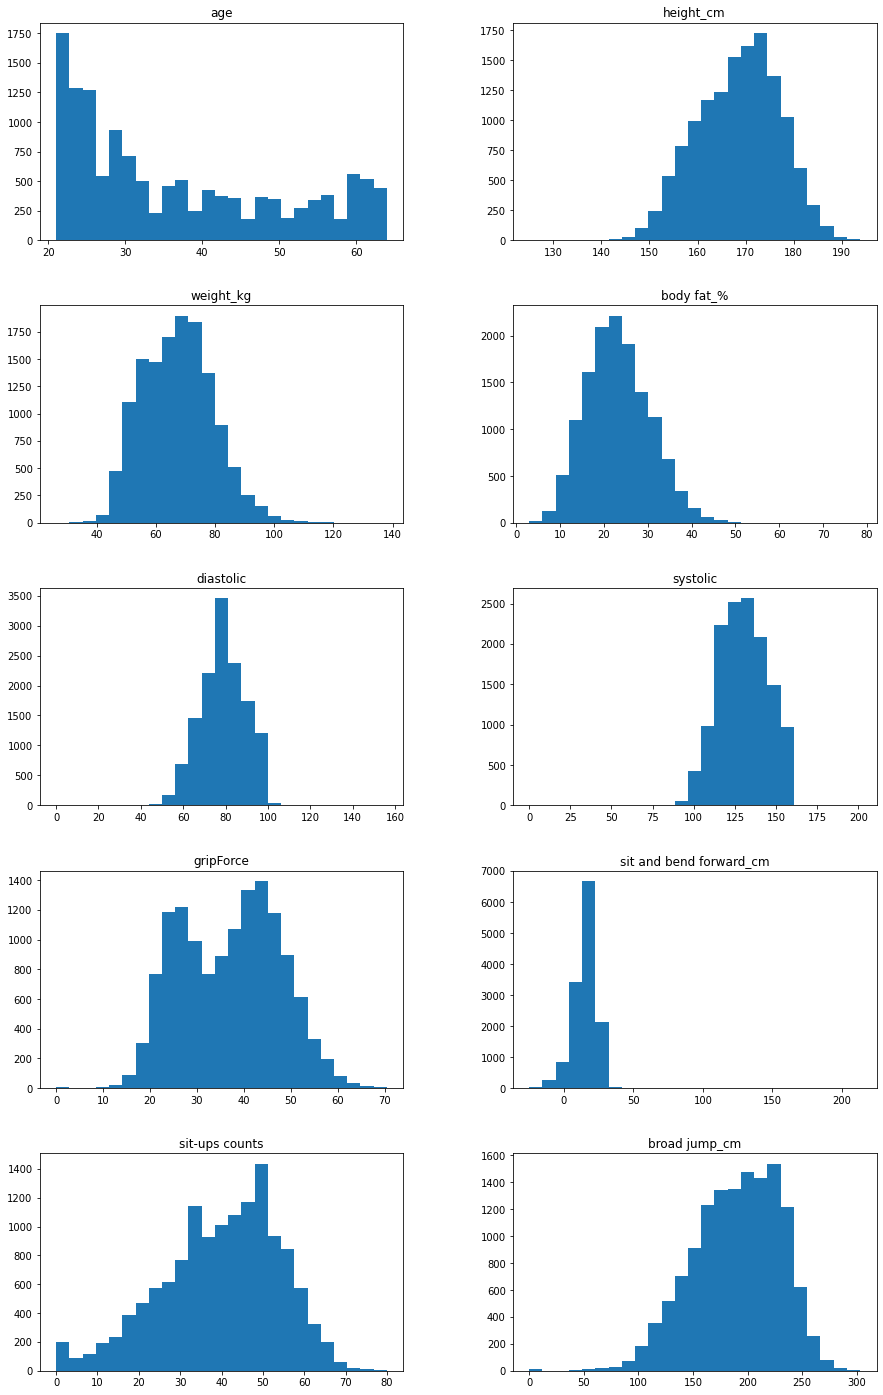

In [5]:
# 1D histograms of each column
data.hist(figsize = (15, 30), layout = (6, 2), grid = False, bins = 25)

In [6]:
# Correlation matrix
data.corr()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
age,1.000000,-0.293980,-0.099966,0.242302,0.158508,0.211167,-0.179583,-0.070033,-0.544581,-0.435172
height_cm,-0.293980,1.000000,0.734909,-0.515440,0.145933,0.210186,0.735024,-0.221970,0.500424,0.674589
weight_kg,-0.099966,0.734909,1.000000,-0.084065,0.262317,0.338943,0.700119,-0.296249,0.294899,0.479564
body fat_%,0.242302,-0.515440,-0.084065,1.000000,0.048059,-0.030376,-0.541788,-0.071225,-0.608912,-0.673273
diastolic,0.158508,0.145933,0.262317,0.048059,1.000000,0.676309,0.202062,-0.072098,0.016547,0.097243
systolic,0.211167,0.210186,0.338943,-0.030376,0.676309,1.000000,0.286012,-0.082434,0.056276,0.152894
gripForce,-0.179583,0.735024,0.700119,-0.541788,0.202062,0.286012,1.000000,-0.112577,0.576669,0.746853
sit and bend forward_cm,-0.070033,-0.221970,-0.296249,-0.071225,-0.072098,-0.082434,-0.112577,1.000000,0.177153,0.026487
sit-ups counts,-0.544581,0.500424,0.294899,-0.608912,0.016547,0.056276,0.576669,0.177153,1.000000,0.748273
broad jump_cm,-0.435172,0.674589,0.479564,-0.673273,0.097243,0.152894,0.746853,0.026487,0.748273,1.000000


(array([1.000e+00, 2.000e+00, 7.000e+00, 1.200e+01, 3.600e+01, 7.000e+01,
        1.170e+02, 2.020e+02, 3.180e+02, 4.320e+02, 5.600e+02, 7.400e+02,
        9.240e+02, 1.080e+03, 1.114e+03, 1.104e+03, 1.093e+03, 7.680e+02,
        5.840e+02, 4.060e+02, 2.280e+02, 1.320e+02, 4.900e+01, 1.700e+01,
        4.000e+00]),
 array([13.8  , 15.624, 17.448, 19.272, 21.096, 22.92 , 24.744, 26.568,
        28.392, 30.216, 32.04 , 33.864, 35.688, 37.512, 39.336, 41.16 ,
        42.984, 44.808, 46.632, 48.456, 50.28 , 52.104, 53.928, 55.752,
        57.576, 59.4  ]),
 <BarContainer object of 25 artists>)

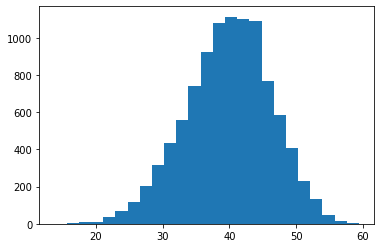

In [7]:
# Applied bootstrapping example / The central limit theorem

R = 10000
n = 5

myList = []

for i in range(R):

    temp = []
    
    for j in range(n):
        # Randomly sample the population n times with replacement
        temp.append( data['sit-ups counts'].iloc[random.randint(2, data.shape[0]-1)] ) 
        
    # Choose a statistic for the sample distribution
    #myList.append(sum(temp))  # The sum
    myList.append(sum(temp)/len(temp))  # The mean
    #myList.append(np.std(temp))  # The standard deviation
    #myList.append(np.std(temp)/np.sqrt(len(temp)))  # The standard error
    
# The central limit theorem tells us that the distribution of this sample statistic should be normally
# distributed, even if the original distribution was not normal!
plt.hist(myList, bins=25)

The central limit theorem allows normal-approximation formulas like the t-distribution to be used in calculating sampling distributions for inference — that is, confidence intervals and hypothesis tests.

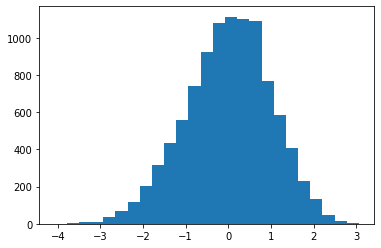

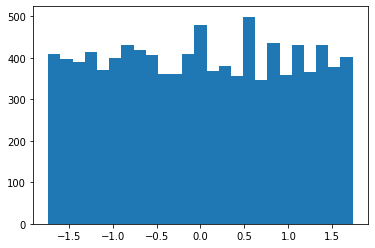

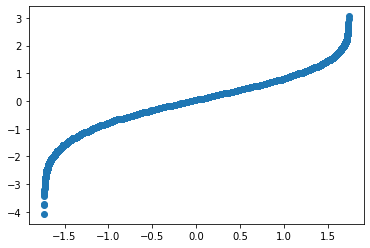

In [8]:
# Convert the sampling statistic to zscores, and show these are normally distributed
zscores = sp.stats.zscore(myList)
plt.hist(zscores, bins=25)
plt.show()

# Convert the above statistics to percentiles
percentiles = stats.rankdata(myList, "average") / len(myList)
percentiles = sp.stats.zscore(percentiles)  # Normalize percentiles to zscore scale
plt.hist(percentiles, bins=25)
plt.show()

#QQ-plot of sampling statistic
plt.scatter(percentiles, zscores)

If the sample statistic were normally distributed, the QQ-plot would be diagonal. We can see that the data is diagonal along the center but diverges at the tails, which means that the data have more extreme values than would be expected from a normal distribution. Perhaps a t-distribution, which is similar to a normal distribution but with thicker tails, would more accurately model the sampling distribution.